In [52]:
import pandas as pd

from itertools import chain
from json import load
from pathlib import Path
from pprint import pprint

In [47]:
base_path = Path("../../data/2_final/1__training")

In [61]:
for p in sorted(base_path.iterdir()):
    oneliner_files = sorted(p.glob("oneliner_*.*"))
    for olfile in oneliner_files:
        olfile.rename(olfile.parent / "oneliner" / olfile.name)

In [13]:
test = pd.read_parquet("../../data/2_final/1__training/001_DISTORTED1sddb40/zscore_predictions_all.parquet")

In [45]:
test.filter(items=["vals"])

,vals
0,-142.928840
1,-164.932650
2,-178.507420
3,-181.063060
4,-172.906480
...,...
79790,17.201994
79791,24.004032
79792,27.221281
79793,34.907786


In [43]:
import numpy as np
np.logspace(1, 10, 10, base=2)

array([   2.,    4.,    8.,   16.,   32.,   64.,  128.,  256.,  512.,
       1024.])

In [42]:
?np.logspace

Signature:
np.logspace(
    start,
    stop,
    num=50,
    endpoint=True,
    base=10.0,
    dtype=None,
    axis=0,
)
Docstring:
Return numbers spaced evenly on a log scale.

In linear space, the sequence starts at ``base ** start``
(`base` to the power of `start`) and ends with ``base ** stop``
(see `endpoint` below).

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

Parameters
----------
start : array_like
    ``base ** start`` is the starting value of the sequence.
stop : array_like
    ``base ** stop`` is the final value of the sequence, unless `endpoint`
    is False.  In that case, ``num + 1`` values are spaced over the
    interval in log-space, of which all but the last (a sequence of
    length `num`) are returned.
num : integer, optional
    Number of samples to generate.  Default is 50.
endpoint : boolean, optional
    If true, `stop` is the last sample. Otherwise, it is not included.
    Default is True.
base : array_like, optional
    The

In [19]:
test["HI_T"] = test["vals_rolling_mean_3"] + 2 * test["vals_rolling_std_3"]
test["LO_T"] = test["vals_rolling_mean_3"] - 2 * test["vals_rolling_std_3"]

In [22]:
test["lagged_HI"] = test["HI_T"].shift(1)
test["lagged_LO"] = test["LO_T"].shift(1)

In [31]:
# test["ANOM"] = (test["vals"] < test["LO_T"]) | (test["HI_T"] < test["vals"])
test["ANOM"] = (test["vals"] < test["lagged_LO"]) | (test["lagged_HI"] < test["vals"])

In [32]:
test["ANOM"].value_counts()

False    49573
True     30222
Name: ANOM, dtype: int64

In [33]:
test["ANOM"].describe()

count     79795
unique        2
top       False
freq      49573
Name: ANOM, dtype: object

In [2]:
p = Path("/home/paulo/Documents/mba_tcc/data/2_final/2__results/")

In [3]:
results = pd.DataFrame(map(load, map(lambda x: x.open(), sorted(p.glob("**/*.json"))))).explode("metrics", ignore_index=True)

In [4]:
all_results = pd.concat([results.drop(columns=["metrics"]), results.metrics.apply(pd.Series)], axis=1)
all_results.head()

,anomaly_index_end,anomaly_index_start,file_name,file_number,file_path,mnemonic,row_count,training_index_end,alpha,dataset,...,precision_mid,recall_back,recall_flat,recall_front,recall_mid,total_anomalies,total_count,true_negatives,true_positives,condition
0,52620,52000,001_UCR_Anomaly_DISTORTED1sddb40_35000_52000_5...,1,/home/paulo/Documents/mba_tcc/data/0_raw/UCR_A...,DISTORTED1sddb40,79795,35000,0.5,all,...,0.505361,0.505102,0.503891,0.502681,0.505361,79794.0,79795,1.0,621.0,NaN
1,52620,52000,001_UCR_Anomaly_DISTORTED1sddb40_35000_52000_5...,1,/home/paulo/Documents/mba_tcc/data/0_raw/UCR_A...,DISTORTED1sddb40,79795,35000,0.5,test_set,...,0.510714,0.505357,0.506932,0.508506,0.510714,44795.0,44795,0.0,621.0,NaN
2,52620,52000,001_UCR_Anomaly_DISTORTED1sddb40_35000_52000_5...,1,/home/paulo/Documents/mba_tcc/data/0_raw/UCR_A...,DISTORTED1sddb40,79795,35000,1.0,all,...,1.000000,1.000000,1.000000,1.000000,1.000000,79794.0,79795,1.0,621.0,NaN
3,52620,52000,001_UCR_Anomaly_DISTORTED1sddb40_35000_52000_5...,1,/home/paulo/Documents/mba_tcc/data/0_raw/UCR_A...,DISTORTED1sddb40,79795,35000,1.0,test_set,...,1.000000,1.000000,1.000000,1.000000,1.000000,44795.0,44795,0.0,621.0,NaN
4,52620,52000,001_UCR_Anomaly_DISTORTED1sddb40_35000_52000_5...,1,/home/paulo/Documents/mba_tcc/data/0_raw/UCR_A...,DISTORTED1sddb40,79795,35000,0.5,all,...,0.005332,0.005323,0.005329,0.005335,0.005332,52746.0,79795,26894.0,466.0,all


In [5]:
all_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   anomaly_index_end    3000 non-null   int64  
 1   anomaly_index_start  3000 non-null   int64  
 2   file_name            3000 non-null   object 
 3   file_number          3000 non-null   int64  
 4   file_path            3000 non-null   object 
 5   mnemonic             3000 non-null   object 
 6   row_count            3000 non-null   int64  
 7   training_index_end   3000 non-null   int64  
 8   alpha                3000 non-null   float64
 9   dataset              3000 non-null   object 
 10  false_negatives      2428 non-null   float64
 11  false_positives      2428 non-null   float64
 12  method               3000 non-null   object 
 13  precision_back       2428 non-null   float64
 14  precision_flat       2428 non-null   float64
 15  precision_front      2428 non-null   f

In [6]:
all_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   anomaly_index_end    3000 non-null   int64  
 1   anomaly_index_start  3000 non-null   int64  
 2   file_name            3000 non-null   object 
 3   file_number          3000 non-null   int64  
 4   file_path            3000 non-null   object 
 5   mnemonic             3000 non-null   object 
 6   row_count            3000 non-null   int64  
 7   training_index_end   3000 non-null   int64  
 8   alpha                3000 non-null   float64
 9   dataset              3000 non-null   object 
 10  false_negatives      2428 non-null   float64
 11  false_positives      2428 non-null   float64
 12  method               3000 non-null   object 
 13  precision_back       2428 non-null   float64
 14  precision_flat       2428 non-null   float64
 15  precision_front      2428 non-null   f

In [12]:
all_results.to_csv("results.csv")

method    file_number  dataset 
oneliner  1            all         AxesSubplot(0.125,0.11;0.775x0.77)
                       test_set    AxesSubplot(0.125,0.11;0.775x0.77)
          2            all         AxesSubplot(0.125,0.11;0.775x0.77)
                       test_set    AxesSubplot(0.125,0.11;0.775x0.77)
sigma     1            all         AxesSubplot(0.125,0.11;0.775x0.77)
                       test_set    AxesSubplot(0.125,0.11;0.775x0.77)
          2            all         AxesSubplot(0.125,0.11;0.775x0.77)
                       test_set    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

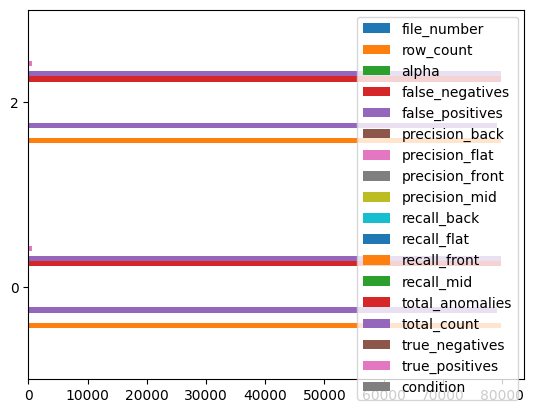

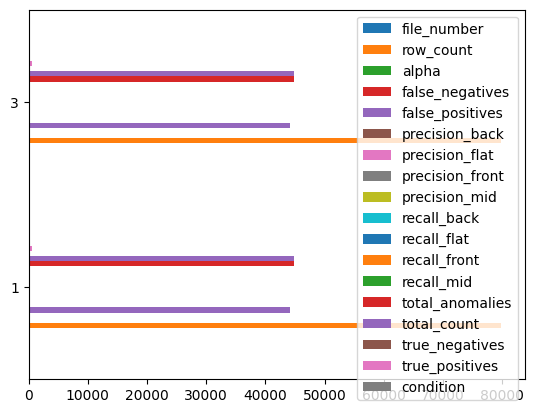

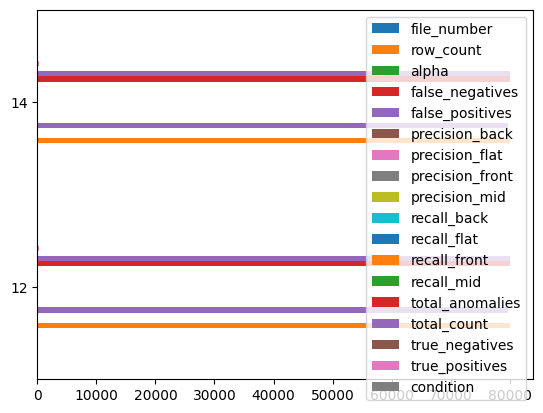

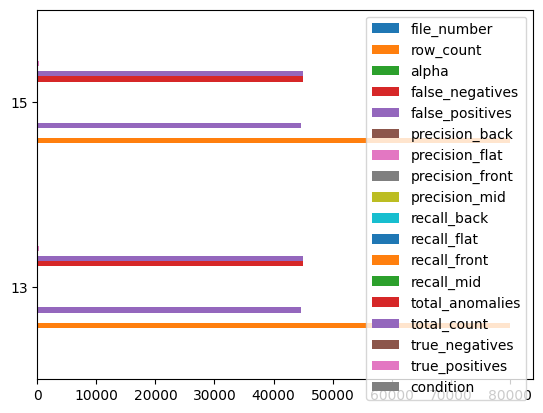

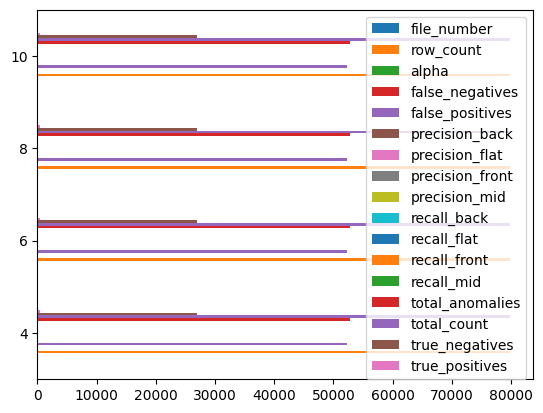

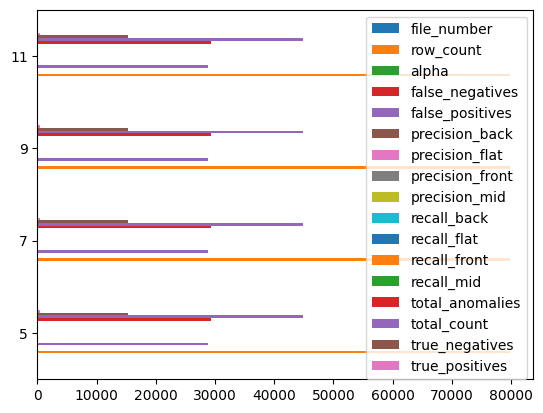

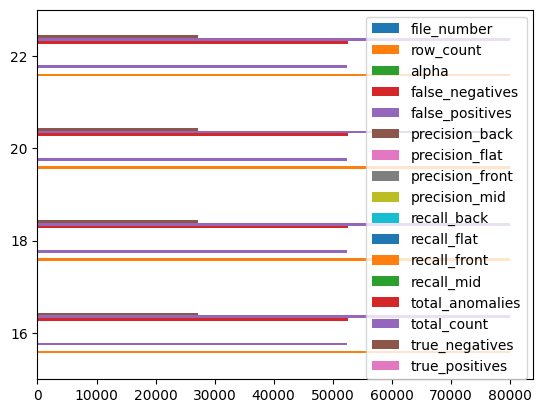

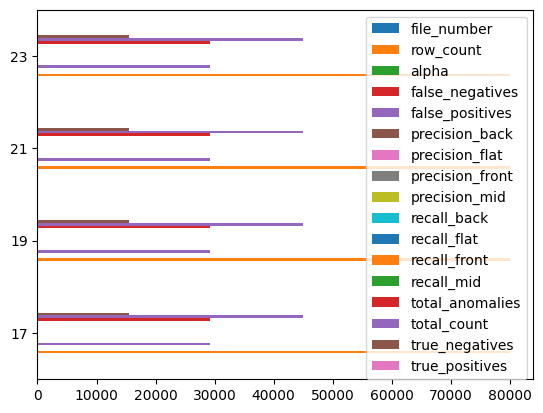

In [11]:
all_results.loc[
    all_results.file_number < 3
].filter(
    like=""
).drop(
    columns=[
        "anomaly_index_end",
        "anomaly_index_start",
        "file_name",
        "file_path",
        "mnemonic",
        "training_index_end",
    ]
).groupby([
    "method",
    "file_number",
    "dataset",
]).plot.barh()